# Analyse Exploratoire

### Import des modules

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

### Analyse Exploratoire

In [5]:
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

In [6]:
# On regarde comment un batiment est défini dans ce jeu de données 
building_consumption.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [7]:
data=building_consumption

In [8]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [9]:
data.nunique()

OSEBuildingID                      3376
DataYear                              1
BuildingType                          8
PrimaryPropertyType                  24
PropertyName                       3362
Address                            3354
City                                  1
State                                 1
ZipCode                              55
TaxParcelIdentificationNumber      3268
CouncilDistrictCode                   7
Neighborhood                         19
Latitude                           2876
Longitude                          2656
YearBuilt                           113
NumberofBuildings                    17
NumberofFloors                       50
PropertyGFATotal                   3195
PropertyGFAParking                  496
PropertyGFABuilding(s)             3193
ListOfAllPropertyUseTypes           466
LargestPropertyUseType               56
LargestPropertyUseTypeGFA          3122
SecondLargestPropertyUseType         50
SecondLargestPropertyUseTypeGFA    1352


In [10]:
# J'enlève les colonnes inutiles
data=data.drop(columns=['Electricity(kWh)','NaturalGas(therms)']) # redondant avec les kBtu qui sont utilisés dans d'autres colonnes
data=data.drop(columns=['Comments']) # Pas de données
data=data.drop(columns=['DataYear','City','State']) # 2016 à Seattle...

In [11]:
data

,OSEBuildingID,BuildingType,PrimaryPropertyType,PropertyName,Address,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,NonResidential,Hotel,Mayflower park hotel,405 Olive way,98101.0,0659000030,7,DOWNTOWN,47.61220,...,7.226362e+06,7.456910e+06,2003882.00,3.946027e+06,1.276453e+06,False,Compliant,NaN,249.98,2.83
1,2,NonResidential,Hotel,Paramount Hotel,724 Pine street,98101.0,0659000220,7,DOWNTOWN,47.61317,...,8.387933e+06,8.664479e+06,0.00,3.242851e+06,5.145082e+06,False,Compliant,NaN,295.86,2.86
2,3,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,98101.0,0659000475,7,DOWNTOWN,47.61393,...,7.258702e+07,7.393711e+07,21566554.00,4.952666e+07,1.493800e+06,False,Compliant,NaN,2089.28,2.19
3,5,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,98101.0,0659000640,7,DOWNTOWN,47.61412,...,6.794584e+06,6.946800e+06,2214446.25,2.768924e+06,1.811213e+06,False,Compliant,NaN,286.43,4.67
4,8,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,98121.0,0659000970,7,DOWNTOWN,47.61375,...,1.417261e+07,1.465650e+07,0.00,5.368607e+06,8.803998e+06,False,Compliant,NaN,505.01,2.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,NaN,1624049080,2,GREATER DUWAMISH,47.56722,...,8.497457e+05,9.430032e+05,0.00,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70
3372,50223,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,NaN,3558300000,2,DOWNTOWN,47.59625,...,9.502762e+05,1.053706e+06,0.00,3.965461e+05,5.537300e+05,False,Compliant,NaN,32.17,2.01
3373,50224,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,...,5.765898e+06,6.053764e+06,0.00,1.792159e+06,3.973739e+06,False,Compliant,NaN,223.54,16.99
3374,50225,Nonresidential COS,Mixed Use Property,South Park Community Center,8319 8th Ave S,NaN,7883603155,1,GREATER DUWAMISH,47.52832,...,7.194712e+05,7.828413e+05,0.00,3.488702e+05,3.706010e+05,False,Compliant,NaN,22.11,1.57


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   BuildingType                     3376 non-null   object 
 2   PrimaryPropertyType              3376 non-null   object 
 3   PropertyName                     3376 non-null   object 
 4   Address                          3376 non-null   object 
 5   ZipCode                          3360 non-null   float64
 6   TaxParcelIdentificationNumber    3376 non-null   object 
 7   CouncilDistrictCode              3376 non-null   int64  
 8   Neighborhood                     3376 non-null   object 
 9   Latitude                         3376 non-null   float64
 10  Longitude                        3376 non-null   float64
 11  YearBuilt                        3376 non-null   int64  
 12  NumberofBuildings   

Vu que tous les bâtiments ont un OSEBuildingID, je retire toutes les autres infos liées au bâtiments qui ne me sont pas utiles pour la mission (nom, adresse...)

In [14]:
data=data.drop(columns=['PropertyName','Address','ZipCode','TaxParcelIdentificationNumber','CouncilDistrictCode'])

In [15]:
#Je crée un df avec tous les outliers pour pouvoir les étudier ensuite
outlier=data.loc[~data['Outlier'].isna()]
outlier.shape

(32, 35)

### BuildingType

In [17]:
data.groupby(by=['BuildingType']).count()

,OSEBuildingID,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
BuildingType,,,,,,,,,,,,,,,,,,,,,
Campus,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,0,24,24
Multifamily HR (10+),110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,1,110,110
Multifamily LR (1-4),1018,1018,1018,1018,1018,1018,1012,1018,1018,1018,...,1015,1015,1011,1011,1011,1018,1018,12,1011,1011
Multifamily MR (5-9),580,580,580,580,580,580,580,580,580,580,...,580,580,580,580,580,580,580,2,580,580
NonResidential,1460,1460,1460,1460,1460,1460,1458,1460,1460,1460,...,1458,1457,1458,1458,1458,1460,1460,15,1458,1458
Nonresidential COS,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,1,85,85
Nonresidential WA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
SPS-District K-12,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,1,98,98


In [18]:
data.groupby(by=['BuildingType']).count()

,OSEBuildingID,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
BuildingType,,,,,,,,,,,,,,,,,,,,,
Campus,24,24,24,24,24,24,24,24,24,24,...,24,24,24,24,24,24,24,0,24,24
Multifamily HR (10+),110,110,110,110,110,110,110,110,110,110,...,110,110,110,110,110,110,110,1,110,110
Multifamily LR (1-4),1018,1018,1018,1018,1018,1018,1012,1018,1018,1018,...,1015,1015,1011,1011,1011,1018,1018,12,1011,1011
Multifamily MR (5-9),580,580,580,580,580,580,580,580,580,580,...,580,580,580,580,580,580,580,2,580,580
NonResidential,1460,1460,1460,1460,1460,1460,1458,1460,1460,1460,...,1458,1457,1458,1458,1458,1460,1460,15,1458,1458
Nonresidential COS,85,85,85,85,85,85,85,85,85,85,...,85,85,85,85,85,85,85,1,85,85
Nonresidential WA,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,1,1
SPS-District K-12,98,98,98,98,98,98,98,98,98,98,...,98,98,98,98,98,98,98,1,98,98


Je devrais conserver seulement les bâtiments Non-résidentiels. Mais avant je dois vérifier qu'il n'y a pas d'erreur d'attribution. En étudiant les outliers notamment.

In [20]:
data.groupby(by=['BuildingType']).describe()

OSEBuildingID                                       \
                             count          mean           std      min   
BuildingType                                                              
Campus                        24.0  17859.791667  14785.670884     43.0   
Multifamily HR (10+)         110.0  26386.836364   9679.874641    684.0   
Multifamily LR (1-4)        1018.0  25078.306483   5754.327416    296.0   
Multifamily MR (5-9)         580.0  27448.724138  10259.216171     13.0   
NonResidential              1460.0  16105.348630  13335.196101      1.0   
Nonresidential COS            85.0  24699.776471  18873.457367      9.0   
Nonresidential WA              1.0  50101.000000           NaN  50101.0   
SPS-District K-12             98.0  11806.122449  12624.265492     28.0   

                                                           Latitude  \
                           25%      50%       75%      max    count   
BuildingType                                                          
Campus                  428.75  21481.5  24331.75  49967.0     24.0   
Multifamily HR (10+)  21337.25  23715.0  27092.75  50078.0    110.0   
Multifamily LR (1-4)  21840.00  24279.0  26508.25  50098.0   1018.0   
Multifamily MR (5-9)  21338.25  24260.0  27225.00  50095.0    580.0   
NonResidential          609.75  21140.5  24567.00  50094.0   1460.0   
Nonresidential COS      619.00  23975.0  49705.00  50226.0     85.0   
Nonresidential WA     50101.00  50101.0  50101.00  50101.0      1.0   
SPS-District K-12       212.50    852.0  23838.25  49703.0     98.0   

                                 ... TotalGHGEmissions            \
                           mean  ...               75%       max   
BuildingType                     ...                               
Campus                47.602887  ...           777.970  16870.98   
Multifamily HR (10+)  47.617309  ...           335.760   2489.78   
Multifamily LR (1-4)  47.636416  ...            32.410    531.96   
Multifamily MR (5-9)  47.626521  ...            86.790    686.53   
NonResidential        47.616115  ...           133.560  12307.16   
Nonresidential COS    47.617491  ...           192.120    804.20   
Nonresidential WA     47.661270  ...            22.170     22.17   
SPS-District K-12     47.616670  ...           119.795    443.73   

                     GHGEmissionsIntensity                                    \
                                     count      mean       std   min     25%   
BuildingType                                                                   
Campus                                24.0  4.169583  6.872976  0.52  1.4250   
Multifamily HR (10+)                 110.0  1.205636  1.059620  0.15  0.5975   
Multifamily LR (1-4)                1011.0  0.698318  0.955655  0.00  0.1700   
Multifamily MR (5-9)                 580.0  0.762103  0.819773  0.00  0.1900   
NonResidential                      1458.0  1.543018  2.154939 -0.02  0.3300   
Nonresidential COS                    85.0  2.728706  3.266465  0.01  0.9400   
Nonresidential WA                      1.0  0.330000       NaN  0.33  0.3300   
SPS-District K-12                     98.0  0.985816  0.591510  0.00  0.5700   

                                            
                        50%     75%    max  
BuildingType                                
Campus                1.890  3.3400  34.09  
Multifamily HR (10+)  0.905  1.4050   7.63  
Multifamily LR (1-4)  0.220  0.8100  11.38  
Multifamily MR (5-9)  0.540  0.9200   7.01  
NonResidential        0.800  1.8700  25.71  
Nonresidential COS    1.810  3.0500  16.99  
Nonresidential WA     0.330  0.3300   0.33  
SPS-District K-12     0.925  1.4075   2.39  

[8 rows x 192 columns]

In [21]:
data[['BuildingType','Electricity(kBtu)']].groupby(by=['BuildingType']).describe()

Electricity(kBtu)                                         \
                                 count          mean           std        min   
BuildingType                                                                    
Campus                            24.0  4.888668e+07  1.336755e+08   358020.0   
Multifamily HR (10+)             110.0  5.729858e+06  4.701213e+06   623335.0   
Multifamily LR (1-4)            1011.0  1.007579e+06  9.344576e+05        0.0   
Multifamily MR (5-9)             580.0  1.895387e+06  1.667139e+06    13409.0   
NonResidential                  1458.0  5.514732e+06  1.329224e+07  -115417.0   
Nonresidential COS                85.0  3.939484e+06  7.462606e+06    72371.0   
Nonresidential WA                  1.0  3.180819e+06           NaN  3180819.0   
SPS-District K-12                 98.0  1.872060e+06  2.357504e+06        0.0   

                                                                        
                             25%         50%          75%          max  
BuildingType                                                            
Campus                3281338.25  12066791.0  28533670.00  657074389.0  
Multifamily HR (10+)  2719484.25   4281060.0   7108404.25   30306111.0  
Multifamily LR (1-4)   522835.50    739043.0   1128134.50   12525426.0  
Multifamily MR (5-9)   841925.75   1437644.0   2329540.25   14681945.0  
NonResidential         704226.50   1658949.5   5076645.50  274532495.0  
Nonresidential COS     795829.00   1470885.0   3928695.00   61576180.0  
Nonresidential WA     3180819.00   3180819.0   3180819.00    3180819.0  
SPS-District K-12      789529.25   1215556.0   1911542.00   18175883.0

In [22]:
outlier.loc[outlier['BuildingType']=='Multifamily HR (10+)']

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
720,19708,Multifamily HR (10+),High-Rise Multifamily,DOWNTOWN,47.61706,-122.35141,1982,1.0,24,167941,...,2407904.5,2589125.5,0.0,2137828.0,270076.0,False,Non-Compliant,Low outlier,29.25,0.17


La seule ligne est un Low Outlier, je considère qu'il est bien attibué

In [24]:
outlier[['BuildingType','Electricity(kBtu)','Outlier']].loc[outlier['BuildingType']=='Multifamily LR (1-4)']

,BuildingType,Electricity(kBtu),Outlier
834,Multifamily LR (1-4),255971.0,Low outlier
962,Multifamily LR (1-4),702481.0,Low outlier
1341,Multifamily LR (1-4),191498.0,Low outlier
1707,Multifamily LR (1-4),6691197.0,High outlier
1888,Multifamily LR (1-4),164818.0,Low outlier
2353,Multifamily LR (1-4),200056.0,Low outlier
2476,Multifamily LR (1-4),154798.0,Low outlier
2763,Multifamily LR (1-4),1756636.0,High outlier
2863,Multifamily LR (1-4),1002382.0,High outlier
2922,Multifamily LR (1-4),1993750.0,High outlier


In [25]:
outlier[['BuildingType','Electricity(kBtu)','Outlier']].loc[outlier['BuildingType']=='Multifamily MR (5-9)']

,BuildingType,Electricity(kBtu),Outlier
3092,Multifamily MR (5-9),1568735.0,High outlier
3341,Multifamily MR (5-9),13409.0,Low outlier


In [26]:
outlier[['BuildingType','Electricity(kBtu)','Outlier']].loc[outlier['BuildingType']=='SPS-District K-12']

,BuildingType,Electricity(kBtu),Outlier
839,SPS-District K-12,246628.0,Low outlier


### filtre bâtiment

Je ne garde que les bâtiments non résidentiels en accord avec la mission.

In [29]:
residential=['NonResidential','Nonresidential COS','Nonresidential WA']

In [30]:
data=data.loc[data['BuildingType'].isin(residential)]

### Immeubles monousage

J'ajoute une colonne booléenne sur l'immeuble mono ou multi usages

In [33]:
def monousage(valeur):
    if pd.isna(valeur) is True :
        return 'Oui'
    else : return 'Non'

data['Monousage'] = data['SecondLargestPropertyUseType'].apply(monousage)

In [34]:
data.head()

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Monousage
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,7456910.0,2003882.00,3946027.0,1276453.0,False,Compliant,NaN,249.98,2.83,Oui
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,8664479.0,0.00,3242851.0,5145082.0,False,Compliant,NaN,295.86,2.86,Non
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,73937112.0,21566554.00,49526664.0,1493800.0,False,Compliant,NaN,2089.28,2.19,Oui
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,6946800.5,2214446.25,2768924.0,1811213.0,False,Compliant,NaN,286.43,4.67,Oui
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,14656503.0,0.00,5368607.0,8803998.0,False,Compliant,NaN,505.01,2.88,Non


### Choix Variables cibles

Nous devrons prédire l'émission en GES totale des bâtiments ainsi que leur consommation totale d'énergie. jDans cette optique, je choisis SiteEnergyUse qui combine toutes ces paramètres.

In [37]:
data.head(1)

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Monousage
0,1,NonResidential,Hotel,DOWNTOWN,47.6122,-122.33799,1927,1.0,12,88434,...,7456910.0,2003882.0,3946027.0,1276453.0,False,Compliant,NaN,249.98,2.83,Oui


In [107]:
data=data.drop(columns=['SiteEnergyUseWN(kBtu)','SteamUse(kBtu)','SiteEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SourceEUIWN(kBtu/sf)','SiteEUI(kBtu/sf)'])

KeyError: "['SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEUI(kBtu/sf)'] not found in axis"

In [ ]:
data['DefaultData']

In [ ]:
data.nunique()

In [ ]:
data.info()

In [ ]:
data[['LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA']].head()

In [ ]:
data.head()

## Barplots

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

sns.barplot(data=data, x='BuildingType', y='TotalGHGEmissions', ax=axes[0])
axes[0].set_title('Émissions de GES par type de bâtiment')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=data, x='BuildingType', y='Electricity(kBtu)', ax=axes[1])
axes[1].set_title('Consommation électrique par type de bâtiment')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=data, x='BuildingType', y='NaturalGas(kBtu)', ax=axes[2])
axes[2].set_title('Consommation gaz naturel par type de bâtiment')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
data.head(0)

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

sns.barplot(data=data, x='Monousage', y='TotalGHGEmissions', ax=axes[0])
axes[0].set_title('Émissions de GES par type de bâtiment')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(data=data, x='Monousage', y='Electricity(kBtu)', ax=axes[1])
axes[1].set_title('Consommation électrique par type de bâtiment')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(data=data, x='Monousage', y='NaturalGas(kBtu)', ax=axes[2])
axes[2].set_title('Consommation gaz naturel par type de bâtiment')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
data[['LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA']].head()

## Outliers

Afin d'avoir un modèle performant, je retire les outliers.

In [113]:
data['Outlier'].value_counts()

Series([], Name: count, dtype: int64)

In [119]:
data=data.loc[data['Outlier']!='High outlier']

In [121]:
data=data.loc[data['Outlier']!='Low outlier']

## Scatterplot

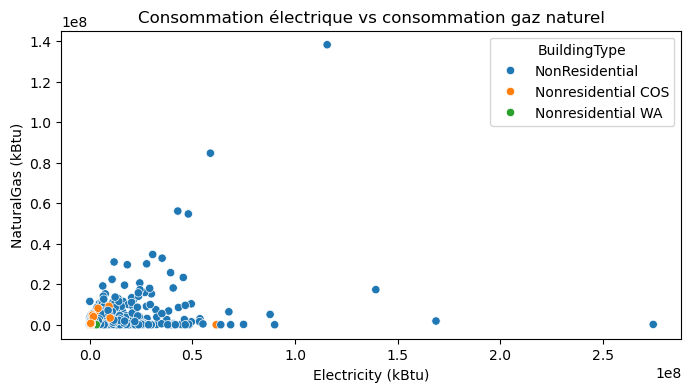

In [124]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Electricity(kBtu)', y='NaturalGas(kBtu)', hue='BuildingType')
plt.title('Consommation électrique vs consommation gaz naturel')
plt.xlabel('Electricity (kBtu)')
plt.ylabel('NaturalGas (kBtu)')
plt.show()

Je retire les outliers: Electricity>1e8 kBtu ou NaturalGas >1e8 kBtu

In [138]:
data=data.loc[(data['Electricity(kBtu)'] < 1e8) & (data['NaturalGas(kBtu)'] < 1e8)]

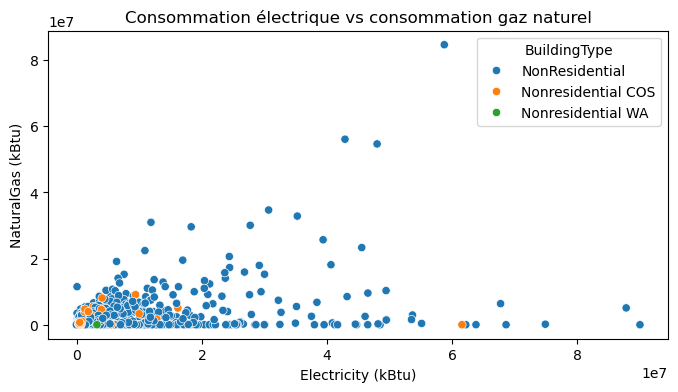

In [140]:
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Electricity(kBtu)', y='NaturalGas(kBtu)', hue='BuildingType')
plt.title('Consommation électrique vs consommation gaz naturel')
plt.xlabel('Electricity (kBtu)')
plt.ylabel('NaturalGas (kBtu)')
plt.show()

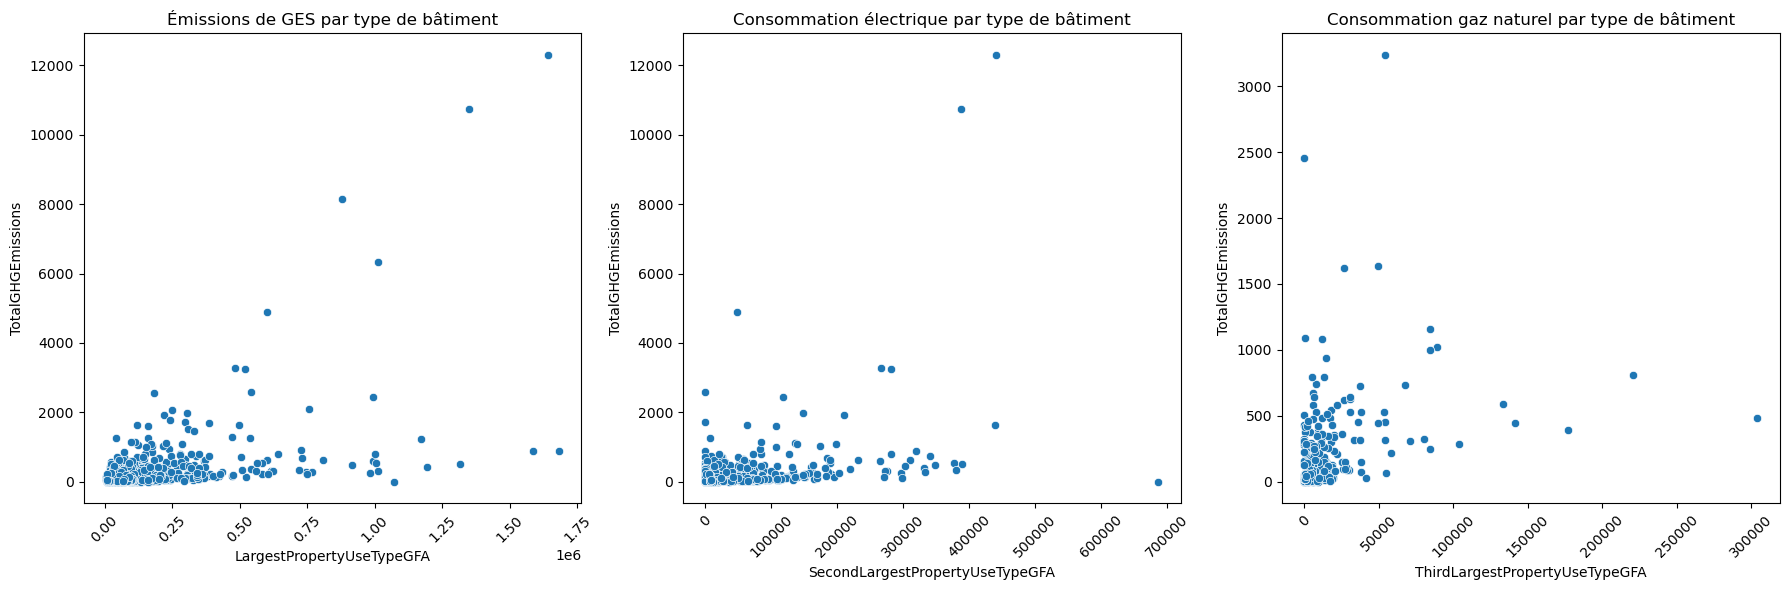

In [51]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 ligne, 3 colonnes

sns.scatterplot(data=data, x='LargestPropertyUseTypeGFA', y='TotalGHGEmissions', ax=axes[0])
axes[0].set_title('Émissions de GES par type de bâtiment')
axes[0].tick_params(axis='x', rotation=45)

sns.scatterplot(data=data, x='SecondLargestPropertyUseTypeGFA', y='TotalGHGEmissions', ax=axes[1])
axes[1].set_title('Consommation électrique par type de bâtiment')
axes[1].tick_params(axis='x', rotation=45)

sns.scatterplot(data=data, x='ThirdLargestPropertyUseTypeGFA', y='TotalGHGEmissions', ax=axes[2])
axes[2].set_title('Consommation gaz naturel par type de bâtiment')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [52]:
data[['BuildingType','LargestPropertyUseType','LargestPropertyUseTypeGFA','SecondLargestPropertyUseType','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseType','ThirdLargestPropertyUseTypeGFA']].groupby(by=['BuildingType']).value_counts()

BuildingType        LargestPropertyUseType  LargestPropertyUseTypeGFA  SecondLargestPropertyUseType    SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA
NonResidential      Distribution Center     19277.0                    Refrigerated Warehouse          4051.0                           Office                       2592.0                            1
                                            20736.0                    Office                          1250.0                           Retail Store                 1250.0                            1
                                            23146.0                    Non-Refrigerated Warehouse      15724.0                          Office                       8255.0                            1
                                            39884.0                    Non-Refrigerated Warehouse      9270.0                           Office                       4116.0                            1


#### TERMINER L'ANALYSE EXPLORATOIRE 

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Qelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

# Modélisation 

### Import des modules 

In [60]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


### Feature Engineering

A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

In [64]:
data

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,YearsENERGYSTARCertified,ENERGYSTARScore,Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Monousage
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,NaN,60.0,3.946027e+06,1.276453e+06,False,Compliant,NaN,249.98,2.83,Oui
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,NaN,61.0,3.242851e+06,5.145082e+06,False,Compliant,NaN,295.86,2.86,Non
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,NaN,43.0,4.952666e+07,1.493800e+06,False,Compliant,NaN,2089.28,2.19,Oui
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,NaN,56.0,2.768924e+06,1.811213e+06,False,Compliant,NaN,286.43,4.67,Oui
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,NaN,75.0,5.368607e+06,8.803998e+06,False,Compliant,NaN,505.01,2.88,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,...,NaN,46.0,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70,Oui
3372,50223,Nonresidential COS,Other,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,NaN,NaN,3.965461e+05,5.537300e+05,False,Compliant,NaN,32.17,2.01,Oui
3373,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,NaN,NaN,1.792159e+06,3.973739e+06,False,Compliant,NaN,223.54,16.99,Non
3374,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,NaN,NaN,3.488702e+05,3.706010e+05,False,Compliant,NaN,22.11,1.57,Non


In [65]:
datafloat=pd.pivot_table(data, index=['OSEBuildingID'],values=['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','ENERGYSTARScore','YearBuilt'],aggfunc='mean')

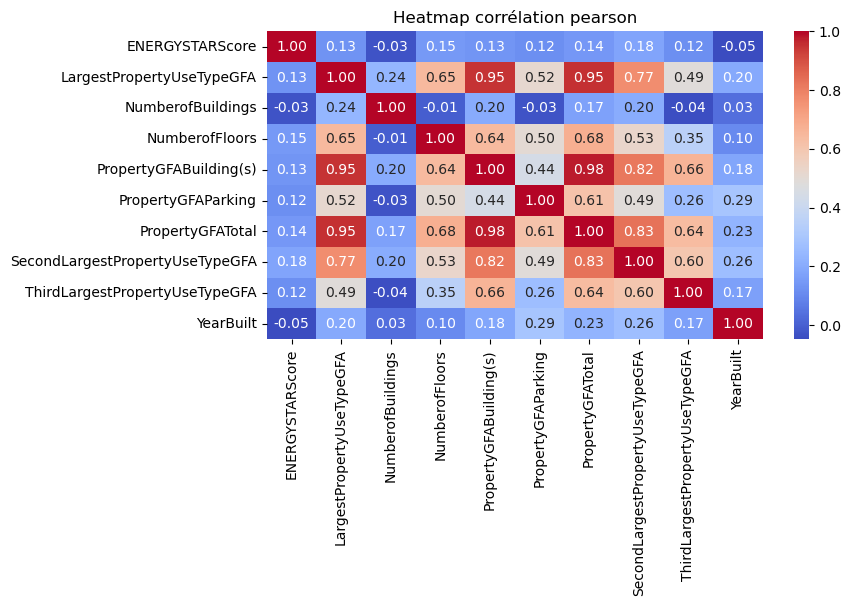

In [66]:
plt.figure(figsize=(8, 4))
sns.heatmap(datafloat.corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f'Heatmap corrélation pearson')
plt.show()

Au vu de leurs corrélations avec propertyGFATotal, on enlève les features suivantes: LargestPropertyUseTypeGFA (et les suivants),PropertyGFABuilding(s)

In [68]:
data=data.drop(columns=['PropertyGFABuilding(s)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'])

In [69]:
datafloat=pd.pivot_table(data, index=['OSEBuildingID'],values=['NumberofBuildings','NumberofFloors','PropertyGFATotal','PropertyGFAParking','ENERGYSTARScore','YearBuilt'],aggfunc='mean')

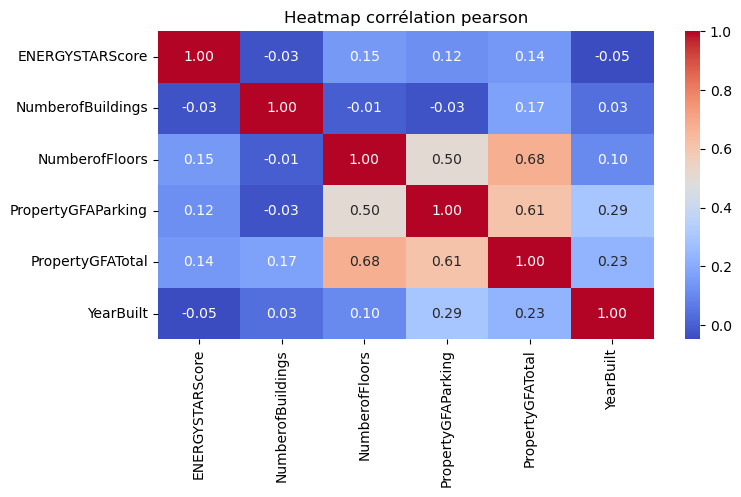

In [70]:
plt.figure(figsize=(8, 4))
sns.heatmap(datafloat.corr(method='pearson'), annot=True, fmt=".2f", cmap='coolwarm')
plt.title(f'Heatmap corrélation pearson')
plt.show()

In [71]:
data

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,YearsENERGYSTARCertified,ENERGYSTARScore,Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Monousage
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,NaN,60.0,3.946027e+06,1.276453e+06,False,Compliant,NaN,249.98,2.83,Oui
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,NaN,61.0,3.242851e+06,5.145082e+06,False,Compliant,NaN,295.86,2.86,Non
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,NaN,43.0,4.952666e+07,1.493800e+06,False,Compliant,NaN,2089.28,2.19,Oui
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,NaN,56.0,2.768924e+06,1.811213e+06,False,Compliant,NaN,286.43,4.67,Oui
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,NaN,75.0,5.368607e+06,8.803998e+06,False,Compliant,NaN,505.01,2.88,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,...,NaN,46.0,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,NaN,20.94,1.70,Oui
3372,50223,Nonresidential COS,Other,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,NaN,NaN,3.965461e+05,5.537300e+05,False,Compliant,NaN,32.17,2.01,Oui
3373,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,NaN,NaN,1.792159e+06,3.973739e+06,False,Compliant,NaN,223.54,16.99,Non
3374,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,NaN,NaN,3.488702e+05,3.706010e+05,False,Compliant,NaN,22.11,1.57,Non


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1546 entries, 0 to 3375
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OSEBuildingID                 1546 non-null   int64  
 1   BuildingType                  1546 non-null   object 
 2   PrimaryPropertyType           1546 non-null   object 
 3   Neighborhood                  1546 non-null   object 
 4   Latitude                      1546 non-null   float64
 5   Longitude                     1546 non-null   float64
 6   YearBuilt                     1546 non-null   int64  
 7   NumberofBuildings             1544 non-null   float64
 8   NumberofFloors                1546 non-null   int64  
 9   PropertyGFATotal              1546 non-null   int64  
 10  PropertyGFAParking            1546 non-null   int64  
 11  ListOfAllPropertyUseTypes     1544 non-null   object 
 12  LargestPropertyUseType        1540 non-null   object 
 13  SecondLa

In [73]:
position=pd.pivot_table(data, index=['OSEBuildingID','Neighborhood'],values=['Latitude','Longitude'])

In [74]:
position

,,Latitude,Longitude
OSEBuildingID,Neighborhood,,
1,DOWNTOWN,47.61220,-122.33799
2,DOWNTOWN,47.61317,-122.33393
3,DOWNTOWN,47.61393,-122.33810
5,DOWNTOWN,47.61412,-122.33664
8,DOWNTOWN,47.61375,-122.34047
...,...,...,...
50222,GREATER DUWAMISH,47.56722,-122.31154
50223,DOWNTOWN,47.59625,-122.32283
50224,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784


### Encoding

In [76]:
data['Outlier']=data['Outlier'].replace(to_replace=['Low outlier', 'High outlier'], value=['1', '2'])

In [77]:
data['Outlier']=data['Outlier'].fillna(0)

In [78]:
data['Outlier'].value_counts()

Outlier
0    1530
1      14
2       2
Name: count, dtype: int64

In [79]:
data.nunique()

OSEBuildingID                   1546
BuildingType                       3
PrimaryPropertyType               22
Neighborhood                      19
Latitude                        1391
Longitude                       1306
YearBuilt                        113
NumberofBuildings                 10
NumberofFloors                    45
PropertyGFATotal                1470
PropertyGFAParking               325
ListOfAllPropertyUseTypes        364
LargestPropertyUseType            56
SecondLargestPropertyUseType      47
ThirdLargestPropertyUseType       38
YearsENERGYSTARCertified          64
ENERGYSTARScore                  100
Electricity(kBtu)               1540
NaturalGas(kBtu)                1084
DefaultData                        2
ComplianceStatus                   4
Outlier                            3
TotalGHGEmissions               1482
GHGEmissionsIntensity            452
Monousage                          2
dtype: int64

In [80]:
data['ComplianceStatus'].value_counts()

ComplianceStatus
Compliant                       1514
Non-Compliant                     18
Error - Correct Default Data      13
Missing Data                       1
Name: count, dtype: int64

In [81]:
data

,OSEBuildingID,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,...,YearsENERGYSTARCertified,ENERGYSTARScore,Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,Monousage
0,1,NonResidential,Hotel,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,...,NaN,60.0,3.946027e+06,1.276453e+06,False,Compliant,0,249.98,2.83,Oui
1,2,NonResidential,Hotel,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,...,NaN,61.0,3.242851e+06,5.145082e+06,False,Compliant,0,295.86,2.86,Non
2,3,NonResidential,Hotel,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,...,NaN,43.0,4.952666e+07,1.493800e+06,False,Compliant,0,2089.28,2.19,Oui
3,5,NonResidential,Hotel,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,...,NaN,56.0,2.768924e+06,1.811213e+06,False,Compliant,0,286.43,4.67,Oui
4,8,NonResidential,Hotel,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,...,NaN,75.0,5.368607e+06,8.803998e+06,False,Compliant,0,505.01,2.88,Non
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3371,50222,Nonresidential COS,Office,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,...,NaN,46.0,5.242709e+05,3.254750e+05,True,Error - Correct Default Data,0,20.94,1.70,Oui
3372,50223,Nonresidential COS,Other,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,...,NaN,NaN,3.965461e+05,5.537300e+05,False,Compliant,0,32.17,2.01,Oui
3373,50224,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,...,NaN,NaN,1.792159e+06,3.973739e+06,False,Compliant,0,223.54,16.99,Non
3374,50225,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,47.52832,-122.32431,1989,1.0,1,14101,...,NaN,NaN,3.488702e+05,3.706010e+05,False,Compliant,0,22.11,1.57,Non


### Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

In [84]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

### Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [81]:
# CODE COMPARAISON DES MODELES

### Optimisation et interprétation du modèle

A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [84]:
# CODE OPTIMISATION ET INTERPRETATION DU MODELE